# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in python. 

## Objectives

You will be able to:
* Perform 1 sample and 2 sample KS tests in Python and Scipy
* Compare KS test to visual approaches for checking normality assumptions
* Plot CDF and ECDF to visualize parametric and empirical cumulative distribution functions

## Generate Data

### Let's import necessary libraries and generate some data 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plot Histograms and QQ plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


x_10


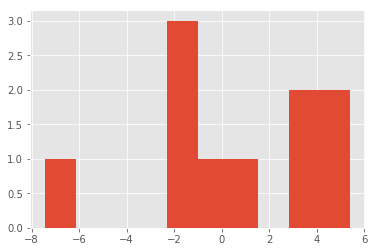

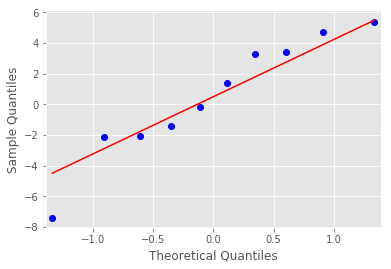

x_50


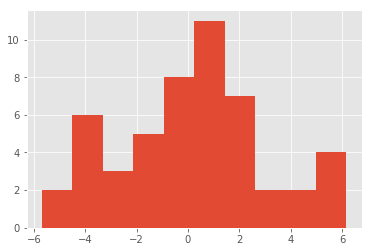

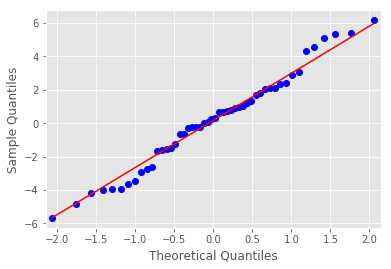

x_100


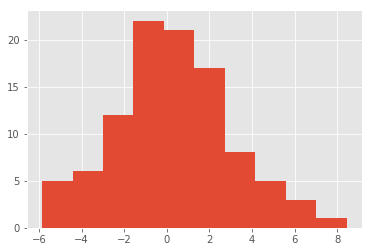

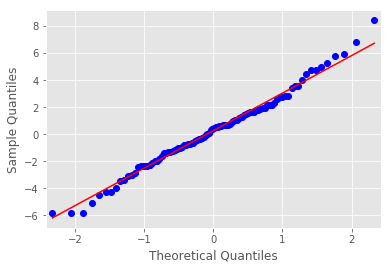

x_1000


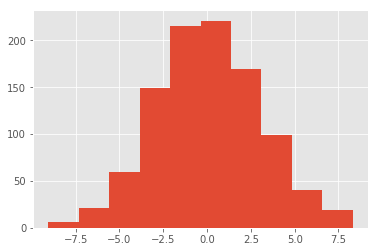

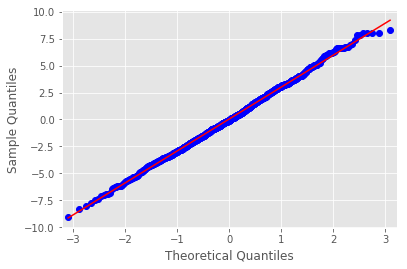

In [8]:
# Plot histograms and QQplots for above datasets
labels = ['x_10','x_50','x_100','x_1000']

for index, i in enumerate([x_10, x_50, x_100, x_1000]):
    print(labels[index])
    plt.hist(i)
    sm.qqplot(i, line='s')
    plt.show()

In [ ]:
# Histograms should not be used solely to detect normality directly.
# These are better to look for symmetry, skewness and outliers.
# So they can instead be used to get indications of non-normality. 
# We see some outliers in our datasets, but have no clear signs of non-normality.

In [ ]:
# QQ plots provide a better picture about normality instead of relying on histograms.
# From QQ plots we can be more assured our data is normal.

### Creat a function to plot the normal CDF and ECDF for a given dataset
- Create a function ks_plot(data) to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3 , having same number of values as data

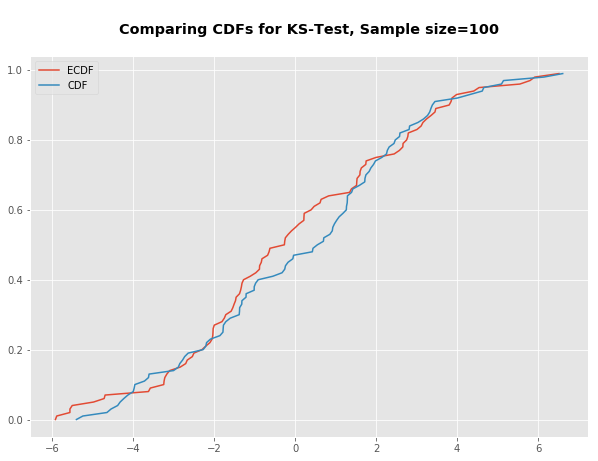

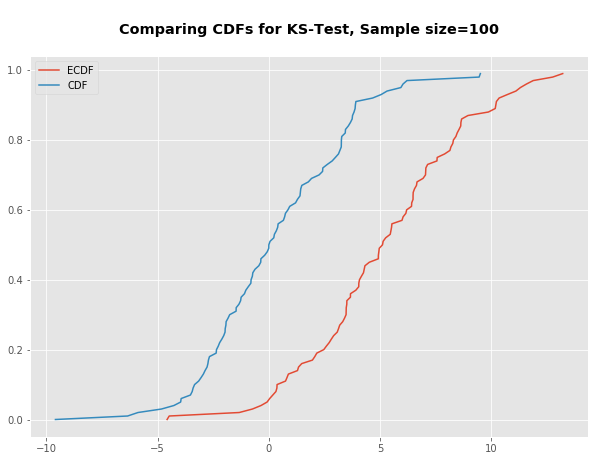

In [14]:
def ks_plot(data):

    plt.figure(figsize=(10, 7))
    
    # sorting the empirical data and plotting the ECDF                     
    plt.plot(np.sort(data), 
             np.linspace(0, 1, len(data), endpoint=False))
       # y = np.linspace(start, stop, num=50, endpoint=True)
    
    # plotting the theoretical CDF
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), 
             np.linspace(0, 1, len(data), endpoint=False))

    plt.legend(['ECDF', 'CDF'])
    plt.title('\nComparing CDFs for KS-Test, Sample size=' + str(len(data)) + '\n', fontweight='bold')
    

ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))

This is awesome. The difference between two cdfs in the second plot show that sample did not come from the distribution which we tried to compare it against. 

### Now you can run all the generated datasets through the function ks_plot and comment on the output.

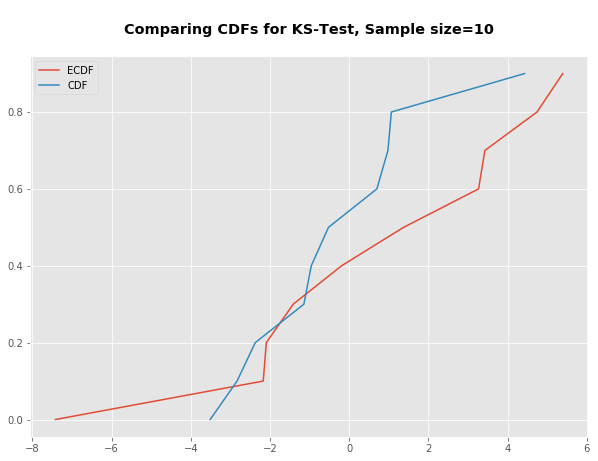

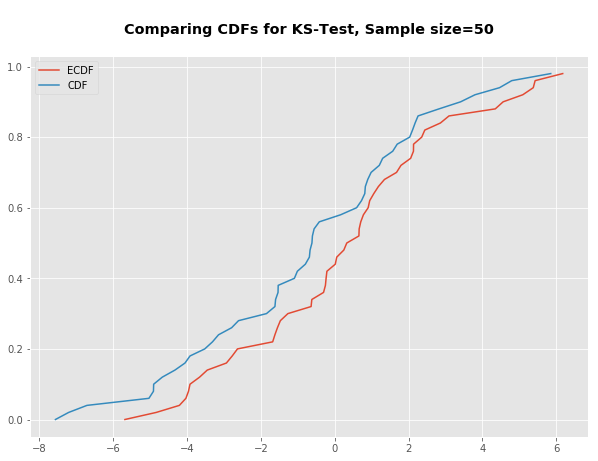

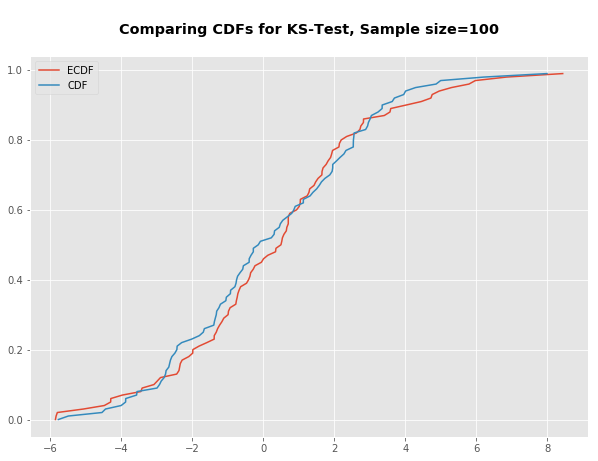

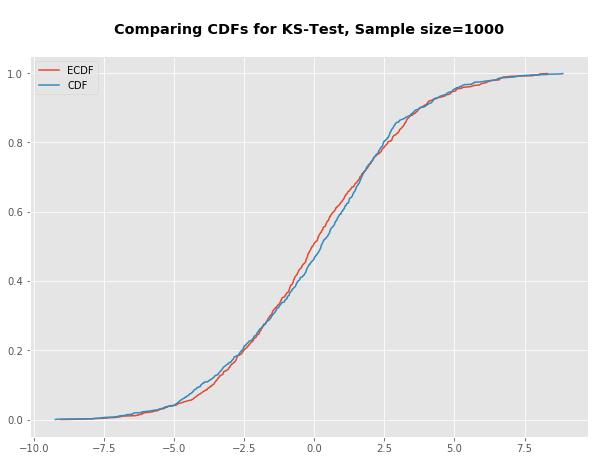

In [15]:
ks_plot(x_10)
ks_plot(x_50)
ks_plot(x_100)
ks_plot(x_1000)

In [ ]:
# The more values we compare, the better the assumption of normality holds!

### KS test in SciPy

Lets run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. It lets us test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the method below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)


### Run KS test for normality assumption using the datasets created earlier and comment on the output
- Perform test KS test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null, and conclude our sample distribution is not identical to a normal distribution.

In [16]:
# Perform KS test 

for i in [x_10, x_50, x_100, x_1000]:
    # scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
    print(stats.kstest(i, 'norm', args=(0, 3)))

# KstestResult(statistic=0.20726402525186666, pvalue=0.7453592647579976)
# KstestResult(statistic=0.11401670469341446, pvalue=0.506142501491317)
# KstestResult(statistic=0.06541325864884379, pvalue=0.7855843705750273)
# KstestResult(statistic=0.026211483799585156, pvalue=0.4974218016349998)

KstestResult(statistic=0.2619296833131991, pvalue=0.4291734226680983)
KstestResult(statistic=0.09990842204638245, pvalue=0.6911205708431094)
KstestResult(statistic=0.09263068991681853, pvalue=0.338157293025787)
KstestResult(statistic=0.015352324710125355, pvalue=0.9724784274766609)


In [120]:
# In all cased the p-value is much greater than 0.05 supporting the Null Hypothesis.
# Hence, we "keep" (cannot reject) the Null Hypothesis, i.e. our sample is IDENTICAL to a normal distribution.


### Generate a uniform distribution and plot / calculate the ks test against a uniform as well as a normal distribution

In [17]:
# generate a uniform distribution
x_uni = np.random.rand(1000)

# calculate the ks-test against a uniform distribution
print(stats.kstest(x_uni, lambda x: x))

# calculate the ks-test against a normal distribution
print(stats.kstest(x_uni, 'norm', args=(0, 3)))

KstestResult(statistic=0.03493986437349628, pvalue=0.17001640622740144)
KstestResult(statistic=0.5000291176004615, pvalue=0.0)


In [1]:
# In the first case, p > 0.05, hence we keep the Null Hypothesis..
# and conclude that our sample is a uniform distribution!

# In second case, p < 0.05, hence we reject the Null Hypothesis 
# and conclude that our sample is NOT normally distributed
# Due to a p value of 0, we have a great degree of confidence!

## 2 sample KS test
A two sample KS test is available in SciPy using following function
```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test 

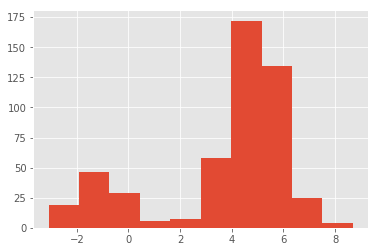

In [18]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), 
                            np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

### Plot the CDFs for x_100_bimodal and x_1000 and comment on the output 

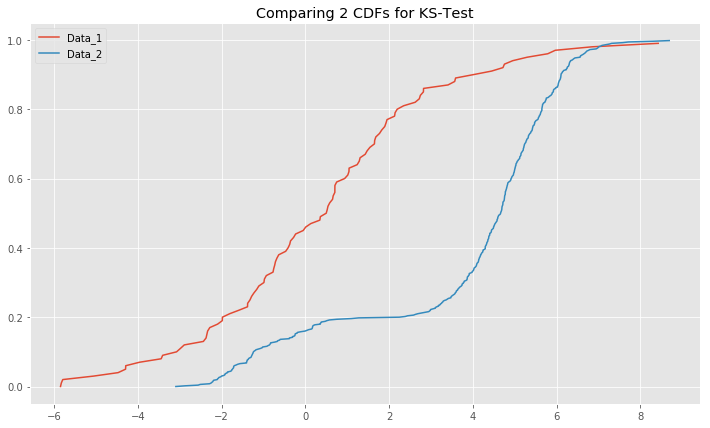

In [27]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entereted must be the same size.
    '''
    length = len(data_1)
    plt.figure(figsize=(12, 7))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend(['Data_1', 'Data_2'])
    plt.title('Comparing 2 CDFs for KS-Test')
    
ks_plot_2sample(x_100, x_1000_bi[:,0])

In [ ]:
# Both empirical distributions differ a lot.
# So we can expect a high value for d statistic.

### Run the two sample KS test on x_100 and x_100_bi and comment on the results

In [29]:
# Check if the distributions are equal
stats.ks_2samp(x_1000, x_1000_bi[:,0])

# Ks_2sampResult(statistic=0.575, pvalue=1.2073337530608254e-14)

Ks_2sampResult(statistic=0.624, pvalue=1.0078644454315076e-114)

In [134]:
# We got a very small p-value, hence the Null Hypotheses is unlikely and we reject it.
# The two samples do not belong to the same distribution, but to different.

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one sample and two sample ks-tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy KS test functions. 